#Proposal

The proposal for accurate disease prediction is important in today's world due to several reasons. First and foremost, accurate disease prediction can significantly improve medical treatment by allowing early intervention and timely management of diseases. This can lead to better patient outcomes, reduced morbidity and mortality rates, and overall improved quality of life for individuals.

Predicting a disease accurately can help in various ways:

Early Detection: Accurate prediction models can identify individuals who are at a higher risk of developing a particular disease. This enables healthcare providers to intervene early, initiate preventive measures, and potentially delay or prevent the onset of the disease.

Personalized Medicine: Disease prediction models can take into account individual characteristics, including genetic information and lifestyle factors, to provide personalized risk assessments. This can guide healthcare professionals in tailoring treatment plans and interventions that are most effective for each patient.

Resource Allocation: Accurate disease prediction can help allocate healthcare resources more efficiently. By identifying high-risk individuals, healthcare providers can focus their efforts on intensive screening and monitoring for those individuals, ensuring timely intervention for those who need it the most. This can help reduce the burden on healthcare systems and optimize resource allocation.

Reduced Healthcare Costs: Early detection and timely intervention can potentially reduce healthcare costs in the long run. By identifying diseases at an earlier stage when they are more treatable, it may be possible to avoid costly hospitalizations, surgeries, or long-term treatments that may be required if the disease progresses.

Furthermore, the impact of accurate disease prediction on the medical field extends beyond individual diseases. The proposed method can be helpful for other diseases as well by leveraging similar approaches. It can assist in developing prediction models for different conditions, such as cancer, cardiovascular diseases, mental health disorders, and infectious diseases. By applying the knowledge and techniques gained from predicting one disease accurately, healthcare professionals can adapt and refine the methodology to address other health concerns effectively.

In summary, accurate disease prediction is crucial in today's world as it improves medical treatment through early detection, personalized medicine, efficient resource allocation, and reduced healthcare costs. Additionally, the proposed method can bridge the knowledge gap and serve as a foundation for predicting and managing other diseases in the future, thereby benefiting the medical field as a whole.

#2. Initial Hypothesis

**Hypothesis 1**: The likelihood of testing positive for COVID-19 is higher among individuals who have had direct contact with confirmed positive cases.

**Hypothesis 2**: Symptoms such as shortness of breath, fever, and cough are significant factors in determining whether a case is positive or negative for COVID-19.

#3. Data Analysis 


##  Importing packages

In [4]:
# relevant libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

##  Loading data

In [47]:
# use Pandas to import data
covid = pd.read_csv('corona_tested_006.csv')

<ipython-input-47-f1b04f34a6ac>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv('corona_tested_006.csv')


**Checking features and statistics of the data**

In [49]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [50]:
covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [51]:
covid.shape

(278848, 11)

In [52]:
covid.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above we can see that only ID is integer other than this all are of object or string variable, so further in the study we have to duplicate them into numerical or float to run the ML model.

In [53]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [54]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

From the above we can observe that there are no null values in the data but there are none values present in age and sex column.

##  Data Cleaning

In [55]:
#Check if there are any diplicate values.
covid.duplicated().sum()

0

Dropping unwanted columns from the data as they are not needed in analysis.


*   Ind_ID



In [56]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [57]:
covid=covid.drop(['Ind_ID'], axis = 1)
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [58]:
#Check the unique values in each column

print(covid.apply(lambda col: col.unique()))

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object


From the above we have observed that:

* There are no null values shown as the data is of object type.

* But there is "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to deal with those values.

* These values are null values , but not recognised as Null value.
So, we have to clean each column separately

**Cough Symptoms**

In [59]:
covid['Cough_symptoms'].value_counts() 

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

From the above we can see that there are 252 None values so we have to remove them or impute them. In this case we cannot use any imputation techniques as this is categorical column and using any imputation will create bias in the data.

Firstly. lets check if there is any relation between these None values of Cough_symptoms and other values in Corona. As if there will be any relation that means we cannot drop the values.

In [60]:
covid = covid[covid.Cough_symptoms != "None"]

In [61]:
covid['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', False, True], dtype=object)

**Fever Column**

In [62]:
covid['Fever'].value_counts()

False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

As there are 2 none value present in the data. So we are going to impute this mode as this is categorical variable.

In [63]:
covid['Fever'].mode()

0    False
Name: Fever, dtype: object

In [64]:
covid['Fever'] = covid['Fever'].apply(lambda x : False if x == 'None' else x)
covid['Fever'].value_counts()

<ipython-input-64-49a18974c73a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Fever'] = covid['Fever'].apply(lambda x : False if x == 'None' else x)


False    137776
FALSE    119069
TRUE      11749
True      10002
Name: Fever, dtype: int64

**Sore Throat**

In [65]:
covid['Sore_throat'].value_counts()

False    212358
FALSE     64316
TRUE       1194
True        728
Name: Sore_throat, dtype: int64

**Shortness of Breath**

In [66]:
covid['Shortness_of_breath'].value_counts()

False    212616
FALSE     64406
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

These does not contain any None values.

Column 'Age_60_above', 'Sex', contains None values. These can be unknown cases or might be there us response bias so we can rename them as unknown.

In [67]:
#renaming "None" value to "Unknown".
covid['Age_60_above'] = covid['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
covid['Age_60_above'].value_counts()

<ipython-input-67-beacd1fe4d51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Age_60_above'] = covid['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)


Unknown    127315
No         125506
Yes         25775
Name: Age_60_above, dtype: int64

In [68]:
#renaming "None" value to "Unknown".
covid['Sex'] = covid['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)
covid['Sex'].value_counts()

<ipython-input-68-3737048c1e6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Sex'] = covid['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)


female     130031
male       129013
Unknown     19552
Name: Sex, dtype: int64

**Known_contact**

In [69]:
covid["Known_contact"].value_counts()

Other                     242506
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

**Corona Column**

In [70]:
covid['Corona'].value_counts()

negative    260008
positive     14696
other         3892
Name: Corona, dtype: int64

From above we can observe that:

* We have three values in our outcome variable. positive , negative and other.
As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.
So , we don't need to train our model for "other" value.
And , we have less than 1% of total records as "other" value.
So , we can drop it.

In [71]:
covid = covid[covid.Corona != "other"]
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Unknown,Unknown,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Unknown,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Unknown,Unknown,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Unknown,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [72]:
covid['Corona'].value_counts()

negative    260008
positive     14696
Name: Corona, dtype: int64

In [73]:
covid.shape

(274704, 10)

After performing data cleaning we are lefct with 274704 values in the data.

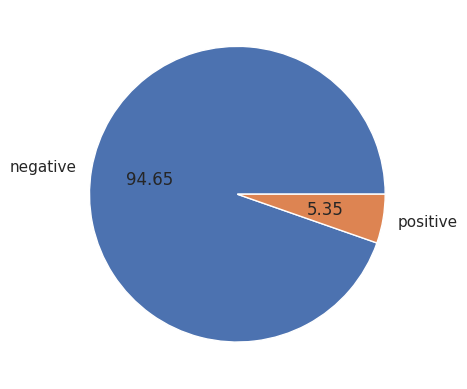

In [74]:
plt.pie(covid['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

In [75]:
#Encoding Corona column
covid['Corona'] = covid['Corona'].map({'negative' : 0 , 'positive' : 1}) 

In [76]:
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,0,Unknown,Unknown,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Unknown,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Unknown,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Unknown,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


**Create New DataFrame**

In [77]:
# creating new dataframe with Corona value 
df_positive = covid[covid['Corona'] == 1]
df_negative = covid[covid['Corona'] == 0]

# Save Cleaned data

In [78]:
covid.to_csv("covid_cleaned.csv")

# Exploratory Data Analysis

**Perform Data Visualization to get an overview about the relation between the Corona and other variables**

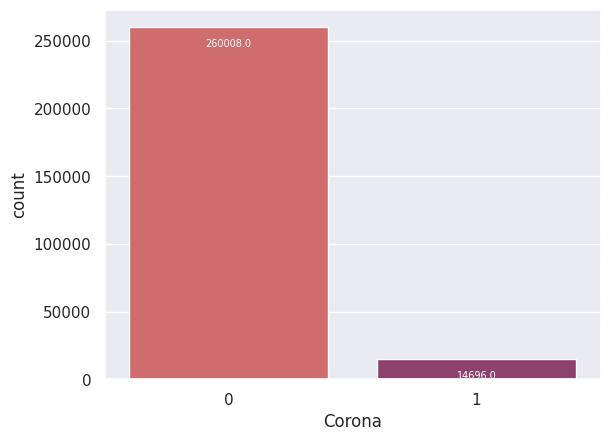

In [79]:
ax = sns.countplot(x='Corona',data=covid, palette="flare")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=7)
plt.show()

From the graph we can observe that patient with negative corona report are very high as compare to patients with corona positive report.

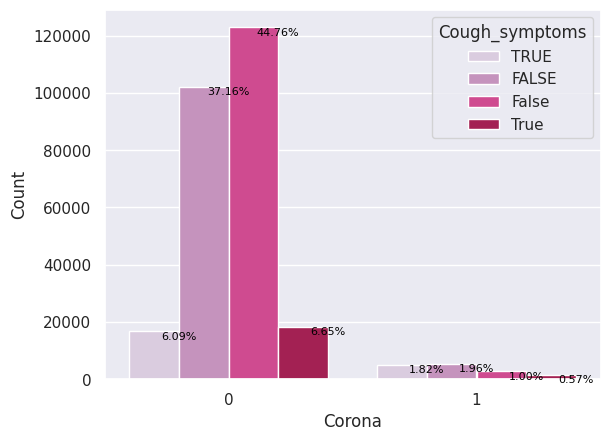

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Corona', hue='Cough_symptoms', data=covid, palette='PuRd')
ax.set_xlabel('Corona')
ax.set_ylabel('Count')

# Annotate the plot with percentages
total = float(len(covid))
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 10), ha='center', va='top', color='black', size=8)

plt.show()

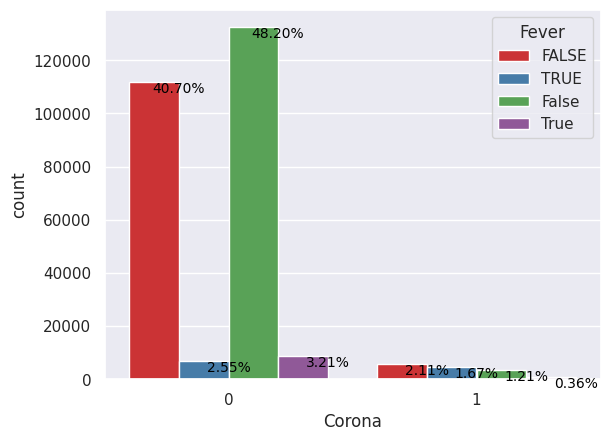

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage
total = float(len(covid))
ax = sns.countplot(x='Corona', hue='Fever', data=covid, palette="Set1")
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 100), ha='center', va='top', color='black', size=10)

plt.show()

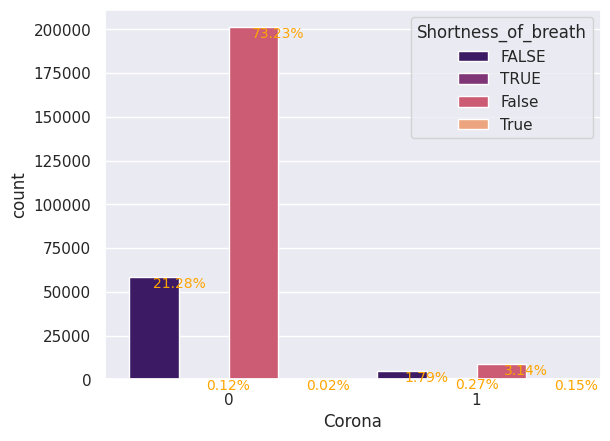

In [82]:
total = float(len(covid))
ax = sns.countplot(x='Corona', hue='Shortness_of_breath', data=covid, palette="magma")
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 100), ha='center', va='top', color='orange', size=10)

plt.show()

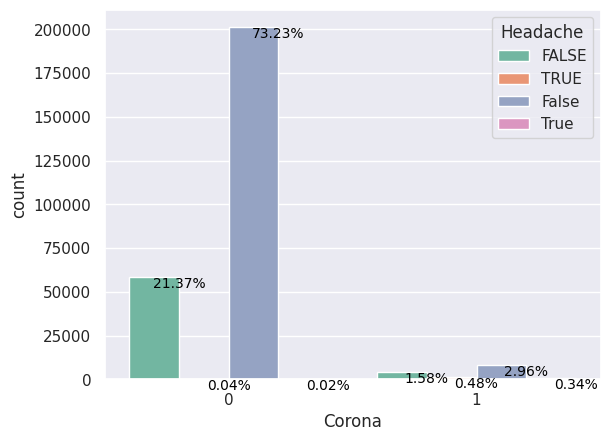

In [83]:
total = float(len(covid))
ax = sns.countplot(x='Corona', hue='Headache', data=covid, palette="Set2")
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 100), ha='center', va='top', color='black', size=10)

plt.show()

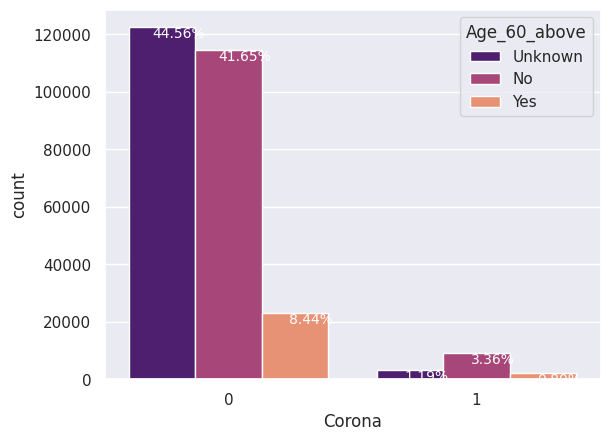

In [84]:
total = float(len(covid))
ax = sns.countplot(x='Corona', hue='Age_60_above', data=covid, palette="magma")
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 100), ha='center', va='top', color='white', size=10)

plt.show()

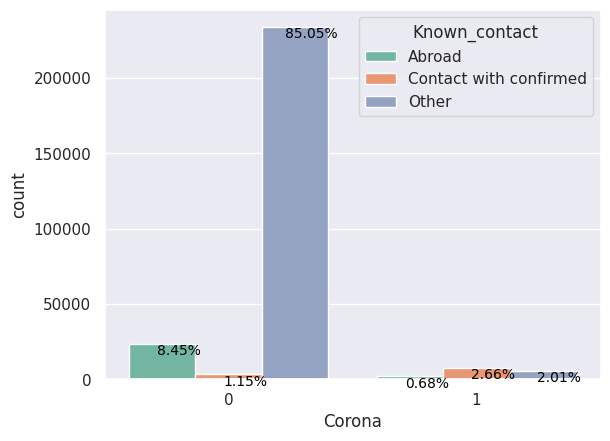

In [85]:
total = float(len(covid))
ax = sns.countplot(x='Corona', hue='Known_contact', data=covid, palette="Set2")
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, height + 100), ha='center', va='top', color='black', size=10)

plt.show()

**Observations **:

Cough_Symptoms and Fever are the most common symptoms among Corona positive patients.

Among corona positive patients male are more than females.

Sore_throat, Shortness_of breath and Headache these symptoms are not in Corona negative patients.

Cough and Fever are the most common symptoms among COVID positive males whose known contact was abroad.

Headache, Shortness of Breath, Sore throat symptom was less common among COVID negative people.

# Feature Engeering

From above we now have general idea about the nature of our data set. Now we will perform required feature engineering techniques.

*Convert categorical variables into numerical to run ML models.

In [86]:
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,0,Unknown,Unknown,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Unknown,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,1,Unknown,Unknown,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Unknown,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


In [87]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [88]:
covid['Age_60_above']=e.fit_transform(covid['Age_60_above'])
covid['Sex']=e.fit_transform(covid['Sex'])
covid['Known_contact']=e.fit_transform(covid['Known_contact'])

In [89]:
covid[['Fever', 'Sore_throat', 'Headache','Cough_symptoms','Shortness_of_breath']] = covid[['Fever', 'Sore_throat', 'Headache','Shortness_of_breath','Cough_symptoms']].astype(str)
covid[['Fever', 'Sore_throat', 'Headache', 'Cough_symptoms','Shortness_of_breath']] = covid[['Fever', 'Sore_throat', 'Headache','Shortness_of_breath','Cough_symptoms']].apply(LabelEncoder().fit_transform)

In [90]:
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,2,0,2,0,0,0,1,0,0
1,11-03-2020,0,2,0,0,0,1,1,0,0
2,11-03-2020,0,2,0,0,0,1,1,0,0
3,11-03-2020,2,0,0,0,0,0,1,0,0
4,11-03-2020,2,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,1,1,1,1,1,1,1,2,2
278844,30-04-2020,1,1,1,1,1,0,1,1,2
278845,30-04-2020,1,1,1,1,1,0,1,2,2
278846,30-04-2020,1,1,1,1,1,0,1,2,2


In [91]:
X = covid.drop(columns = ['Test_date','Corona'],axis = 1)
y = covid['Corona']

# Train and Test Split

We have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation Set and data from 16th April to 30th april as Test Set.

In [92]:
#Firstly, change the datatype of Test_date from object to Datetime
covid['Test_date'] = pd.to_datetime(covid["Test_date"] , format = '%d-%m-%Y')

In [93]:
#we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation and , data from 16th April to 30th april as Test Set.
break_date = pd.Timestamp("2020-04-15")
df_train = covid[covid["Test_date"] <= break_date]
df_test = covid[covid["Test_date"] > break_date]

In [94]:
#data from 11th march 2020 to 15th april 2020
df_train

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,2,0,2,0,0,0,1,0,0
1,2020-03-11,0,2,0,0,0,1,1,0,0
2,2020-03-11,0,2,0,0,0,1,1,0,0
3,2020-03-11,2,0,0,0,0,0,1,0,0
4,2020-03-11,2,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,1,1,1,1,1,0,1,2,2
163185,2020-04-15,1,1,1,1,1,0,1,2,2
163186,2020-04-15,1,1,1,1,1,0,1,1,2
163187,2020-04-15,1,1,1,1,1,0,1,2,2


In [95]:
#data from 16th april to 30th april
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,3,1,1,1,1,0,1,1,0
163190,2020-04-16,1,1,1,1,1,0,1,1,2
163191,2020-04-16,3,1,1,1,1,0,1,1,0
163192,2020-04-16,1,1,1,1,1,0,1,2,2
163193,2020-04-16,1,1,1,1,1,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,1,1,1,1,1,1,1,2,2
278844,2020-04-30,1,1,1,1,1,0,1,1,2
278845,2020-04-30,1,1,1,1,1,0,1,2,2
278846,2020-04-30,1,1,1,1,1,0,1,2,2


## Separating Dataset into Training Set , Test Set and Validation Set

In [96]:
#dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train
X_train = df_train.drop(columns = ['Test_date','Corona'],axis = 1)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,2,0,2,0,0,1,0,0
1,0,2,0,0,0,1,0,0
2,0,2,0,0,0,1,0,0
3,2,0,0,0,0,1,0,0
4,2,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
163184,1,1,1,1,1,1,2,2
163185,1,1,1,1,1,1,2,2
163186,1,1,1,1,1,1,1,2
163187,1,1,1,1,1,1,2,2


In [97]:
#storing outcome variable in y_train.
y_train = df_train['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160465, dtype: int64

In [98]:
#dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.
X_test = df_test.drop(columns = ['Test_date','Corona'],axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,3,1,1,1,1,1,1,0
163190,1,1,1,1,1,1,1,2
163191,3,1,1,1,1,1,1,0
163192,1,1,1,1,1,1,2,2
163193,1,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...
278843,1,1,1,1,1,1,2,2
278844,1,1,1,1,1,1,1,2
278845,1,1,1,1,1,1,2,2
278846,1,1,1,1,1,1,2,2


In [99]:
#storing Outcome variable test Set data into y_test.
y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64


Now , We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1.

In [100]:
#As we have to divide into 4:1 means 20%
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [101]:
#Training Set
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#Validation Set
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (128372, 8)
y_train shape: (128372,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y val shape: (32093,)


# Feature Scaling

In [102]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.62448419, -0.53522773, -1.18256021, ..., -0.52062407,
        -0.51721047,  0.41606962],
       [-0.62448419, -0.53522773, -1.18256021, ..., -0.52062407,
        -0.51721047,  0.41606962],
       [ 0.51017986,  0.88067826,  0.72131783, ...,  0.82322313,
        -0.51721047,  0.41606962],
       ...,
       [ 0.51017986,  0.88067826,  0.72131783, ..., -0.52062407,
        -0.51721047,  0.41606962],
       [-0.62448419, -0.53522773, -1.18256021, ..., -0.52062407,
         0.98958289,  0.41606962],
       [-0.62448419, -0.53522773,  0.72131783, ..., -0.52062407,
        -0.51721047,  0.41606962]])

In [103]:
X_test=sc.transform(X_test)
X_test

array([[ 2.77950794,  0.88067826,  0.72131783, ...,  0.82322313,
        -0.51721047, -2.71547877],
       [ 0.51017986,  0.88067826,  0.72131783, ...,  0.82322313,
        -0.51721047,  0.41606962],
       [ 2.77950794,  0.88067826,  0.72131783, ...,  0.82322313,
        -0.51721047, -2.71547877],
       ...,
       [ 0.51017986,  0.88067826,  0.72131783, ...,  0.82322313,
         0.98958289,  0.41606962],
       [ 0.51017986,  0.88067826,  0.72131783, ...,  0.82322313,
         0.98958289,  0.41606962],
       [ 0.51017986,  0.88067826,  0.72131783, ...,  0.82322313,
        -0.51721047,  0.41606962]])

#Apply ML Techniques

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
### Creating a Logistic regression object
lr = LogisticRegression(random_state = 0)
### Passing independant and dependant training data to the model
lr.fit(X_train,y_train)

#printing and defining Logistic Regression

LogisticRegression(random_state=0)

## KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knn.fit(X_train, y_train) 

#printing and defining KNeighborsClassifier (KNN)

KNeighborsClassifier()

## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#printing and defining Decision Tree

## Random Forest

In [107]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf.fit(X_train, y_train) 
#printing and defining Random Forest

RandomForestClassifier(criterion='entropy', n_estimators=10)

##Predictions

Logistic Regression

In [108]:
lr_pred=lr.predict(X_test)

KNN

In [109]:
knn_pred=knn.predict(X_test)

Decision Tree

In [110]:
dt_pred=dt.predict(X_test)

Random Forest

In [111]:
rf_pred=rf.predict(X_test)

# Model Evaluation

In [112]:
# Train score and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of Logistic Regression is 0.9283021219580594
Accuracy (Test) score of Logistic Regression is 0.961484256689922
Accuracy (Test) score of Logistic Regression is 0.961484256689922
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.51      0.61      2698

    accuracy                           0.98    114239
   macro avg       0.87      0.75      0.80    114239
weighted avg       0.98      0.98      0.98    114239



In [113]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of KNN is 0.9517885520206899
Accuracy (Test) score of KNN is 0.9846549777221439
Accuracy (Test) score of KNN is 0.9846549777221439
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.51      0.61      2698

    accuracy                           0.98    114239
   macro avg       0.87      0.75      0.80    114239
weighted avg       0.98      0.98      0.98    114239



In [114]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

Train accuracy of Decision Tree is 0.9512977907955006
Accuracy (Test) score of Decision Tree is 0.9854165390103204
Accuracy (Test) score of Decision Tree is 0.9854165390103204
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



In [115]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_pred))

Train accuracy of Random Forest is 0.9607546817062911
Accuracy (Test) score of Random Forest is 0.9853990318542705
Accuracy (Test) score of Random Forest is 0.9853990318542705
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



# Making Predictive Model

In [116]:
input_data = (1,1,0,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[ 0.51017986  0.88067826 -1.18256021 -1.19485047  0.69664719  0.82322313
   0.98958289  0.41606962]]
[0]
The person is corona negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Conclusion

By applying the ML algorithms we can conclude that we are getting 98% accuracy by using Logistics regression and KNN and we are getting 99% accuracy using Decision tree and Random Forest. So, for deployment we can use any model between best four.